In [1]:
#import the libraries which will be used
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
import category_encoders as ce
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from urllib.request import urlopen
import html5lib
from bs4 import BeautifulSoup
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
import plotly.express as px


In [22]:
# Download the dataset
dir = 'Downloads/train.csv/train.csv'
sales = pd.read_csv(dir, sep = ',')
pd.options.display.max_columns = None #show all the columns
print(sales.head())#show the dataset first rows

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

In [23]:
sales.isnull().sum() # show the number of NaN of each column

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [24]:
sales.info()#show the structure of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [25]:
# fill Na

sales['Postal Code'].fillna(sales['Postal Code'].median(), inplace=True) # fill the Na with the mode of the variable
    
sales

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [26]:
sales.isnull().sum() # show the number of NaN of each column

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [27]:
sales_final = sales.copy() # copy the dataset

In [28]:
# use a label encoding for the categorical columns with an order
ordinal = ['Order ID', 'Order Date', 'Ship Date', 'Ship Mode']# columns of type ordinal

label_encoder = LabelEncoder()# create the label encoder
for col in ordinal:
    sales_final[col] = label_encoder.fit_transform(sales_final[col]) #transform the columns

In [29]:
# delete the column Country adding its information to the column City
sales_final['City'] = sales_final['Country'] + "-" + sales_final['City'] # add the information
# change name of the column City
sales_final.rename(columns={"City": "Country-City"}, inplace=True)
#delete column Country
sales_final.drop('Country', axis = 1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country-City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,2456,314,476,2,CG-12520,Claire Gute,Consumer,United States-Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,2456,314,476,2,CG-12520,Claire Gute,Consumer,United States-Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,2254,456,673,2,DV-13045,Darrin Van Huff,Corporate,United States-Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,4295,432,774,3,SO-20335,Sean O'Donnell,Consumer,United States-Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,4295,432,774,3,SO-20335,Sean O'Donnell,Consumer,United States-Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,2064,821,1191,3,SH-19975,Sally Hughsby,Corporate,United States-Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,1144,441,697,3,CS-12490,Cindy Schnelling,Corporate,United States-Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,1144,441,697,3,CS-12490,Cindy Schnelling,Corporate,United States-Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,1144,441,697,3,CS-12490,Cindy Schnelling,Corporate,United States-Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [30]:
# unify the categories of State which appeare less than 11 times in the category other
state = pd.DataFrame() # make a empty dataframe
state['State'] = sales_final['State'].value_counts().index # add the index of State's category to the dataset
state['Count'] = sales_final['State'].value_counts().values # add the number of appearance of each category to the dataset

other = []
for k in range(0,len(state)): 
    if state['Count'][k] <= 10: # study if the category appear more than 10 times
        other.append(state['State'][k]) # add the categories to a list

sales_final['State'] = sales_final['State'].replace(other, 'Other')# replace category obtained before by Other
sales_final.groupby('State').size() # review if the change have been done

State
Alabama             61
Arizona            223
Arkansas            60
California        1946
Colorado           179
Connecticut         82
Delaware            93
Florida            373
Georgia            177
Idaho               21
Illinois           483
Indiana            135
Iowa                26
Kansas              24
Kentucky           137
Louisiana           41
Maryland           105
Massachusetts      135
Michigan           253
Minnesota           89
Mississippi         53
Missouri            66
Montana             15
Nebraska            38
Nevada              39
New Hampshire       27
New Jersey         122
New Mexico          37
New York          1097
North Carolina     247
Ohio               454
Oklahoma            66
Oregon             122
Other               30
Pennsylvania       582
Rhode Island        55
South Carolina      42
South Dakota        12
Tennessee          183
Texas              973
Utah                53
Vermont             11
Virginia           224
Washi

In [31]:
# transform columns with many categories using a target encoding
objects = sales_final.select_dtypes('object').columns.tolist()
card_high = []
for k in objects:
    if len(sales_final[k].unique()) >= 500:#search the columns with more than 500 categories
        card_high.append(k)
encoder = ce.TargetEncoder(cols=card_high)# create a target enconder in the selected columns
sales_final = encoder.fit_transform(sales_final, sales_final['Sales'])# use the encoder

In [32]:
sales_final

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,Country-City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,2456,314,476,2,230.584252,230.584252,Consumer,United States,339.214014,Kentucky,42420.0,South,245.084485,Furniture,Bookcases,245.084485,261.9600
1,2,2456,314,476,2,230.584252,230.584252,Consumer,United States,339.214014,Kentucky,42420.0,South,434.050190,Furniture,Chairs,434.050190,731.9400
2,3,2254,456,673,2,204.201215,204.201215,Corporate,United States,238.214534,California,90036.0,West,186.043039,Office Supplies,Labels,186.043039,14.6200
3,4,4295,432,774,3,209.149561,209.149561,Consumer,United States,278.121593,Florida,33311.0,South,386.916903,Furniture,Tables,386.916903,957.5775
4,5,4295,432,774,3,209.149561,209.149561,Consumer,United States,278.121593,Florida,33311.0,South,199.688227,Office Supplies,Storage,199.688227,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,2064,821,1191,3,154.117134,154.117134,Corporate,United States,155.260172,Illinois,60610.0,Central,176.930867,Office Supplies,Binders,176.930867,3.7980
9796,9797,1144,441,697,3,205.421309,205.421309,Corporate,United States,163.126919,Ohio,43615.0,East,189.178408,Office Supplies,Art,189.178408,10.3680
9797,9798,1144,441,697,3,205.421309,205.421309,Corporate,United States,163.126919,Ohio,43615.0,East,319.976385,Technology,Phones,319.976385,235.1880
9798,9799,1144,441,697,3,205.421309,205.421309,Corporate,United States,163.126919,Ohio,43615.0,East,202.399264,Technology,Phones,202.399264,26.3760


In [33]:
# convert the rest of categorical features using one-hot encodering  

objects = sales_final.select_dtypes('object').columns.tolist()# find the vector of categorical variable names

for k in objects: # run the vector of categorical variable names
#inicialize the encoderer
    encoder = OneHotEncoder(sparse = False)

# Fit and transform the categorical columns
    encoded = encoder.fit_transform(sales_final[[k]]) # convert the categorical features
    if hasattr(encoder, 'get_feature_names_out'):# see if the encoderer has the atribute get_feature_names_out
        feature_names = encoder.get_feature_names_out([k]) # add the name of the feature in a list
    else:
        feature_names = [f'{k}_{cat}' for cat in encoder.categories_[0]] # create and add the name of the feature
    encoderdata = pd.DataFrame(encoded, columns=feature_names)# add to the new features to the dataset
 
    sales_final = sales_final.join(encoderdata) # put the new features to the dataset sales_final
sales_final = sales_final.drop(objects, axis=1) # delete old features
sales_final

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Country-City,Postal Code,Product ID,Product Name,Sales,Segment_Consumer,Segment_Corporate,Segment_Home Office,Country_United States,State_Alabama,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_Florida,State_Georgia,State_Idaho,State_Illinois,State_Indiana,State_Iowa,State_Kansas,State_Kentucky,State_Louisiana,State_Maryland,State_Massachusetts,State_Michigan,State_Minnesota,State_Mississippi,State_Missouri,State_Montana,State_Nebraska,State_Nevada,State_New Hampshire,State_New Jersey,State_New Mexico,State_New York,State_North Carolina,State_Ohio,State_Oklahoma,State_Oregon,State_Other,State_Pennsylvania,State_Rhode Island,State_South Carolina,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_Wisconsin,Region_Central,Region_East,Region_South,Region_West,Category_Furniture,Category_Office Supplies,Category_Technology,Sub-Category_Accessories,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,1,2456,314,476,2,230.584252,230.584252,339.214014,42420.0,245.084485,245.084485,261.9600,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2456,314,476,2,230.584252,230.584252,339.214014,42420.0,434.050190,434.050190,731.9400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2254,456,673,2,204.201215,204.201215,238.214534,90036.0,186.043039,186.043039,14.6200,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,4295,432,774,3,209.149561,209.149561,278.121593,33311.0,386.916903,386.916903,957.5775,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,4295,432,774,3,209.149561,209.149561,278.121593,33311.0,199.688227,199.688227,22.3680,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,2064,821,1191,3,154.117134,154.117134,155.260172,60610.0,176.930867,176.930867,3.7980,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [34]:
sales_final.var()# get the variance of the columns

Row ID                   8.004150e+06
Order ID                 2.061068e+06
Order Date               1.250469e+05
Ship Date                1.457374e+05
Ship Mode                1.209537e+00
                             ...     
Sub-Category_Paper       1.179020e-01
Sub-Category_Phones      8.140589e-02
Sub-Category_Storage     7.769822e-02
Sub-Category_Supplies    1.842487e-02
Sub-Category_Tables      3.101737e-02
Length: 85, dtype: float64

In [35]:
#delete the columns with a variance less than 0.01
variance_threshold = 0.01
sales_final = sales_final.loc[:, sales_final.var() > variance_threshold]

In [36]:

sales_final

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Country-City,Postal Code,Product ID,Product Name,Sales,Segment_Consumer,Segment_Corporate,Segment_Home Office,State_Arizona,State_California,State_Colorado,State_Florida,State_Georgia,State_Illinois,State_Indiana,State_Kentucky,State_Maryland,State_Massachusetts,State_Michigan,State_New Jersey,State_New York,State_North Carolina,State_Ohio,State_Oregon,State_Pennsylvania,State_Tennessee,State_Texas,State_Virginia,State_Washington,State_Wisconsin,Region_Central,Region_East,Region_South,Region_West,Category_Furniture,Category_Office Supplies,Category_Technology,Sub-Category_Accessories,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,1,2456,314,476,2,230.584252,230.584252,339.214014,42420.0,245.084485,245.084485,261.9600,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2456,314,476,2,230.584252,230.584252,339.214014,42420.0,434.050190,434.050190,731.9400,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2254,456,673,2,204.201215,204.201215,238.214534,90036.0,186.043039,186.043039,14.6200,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,4295,432,774,3,209.149561,209.149561,278.121593,33311.0,386.916903,386.916903,957.5775,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,4295,432,774,3,209.149561,209.149561,278.121593,33311.0,199.688227,199.688227,22.3680,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,2064,821,1191,3,154.117134,154.117134,155.260172,60610.0,176.930867,176.930867,3.7980,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9796,9797,1144,441,697,3,205.421309,205.421309,163.126919,43615.0,189.178408,189.178408,10.3680,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9797,9798,1144,441,697,3,205.421309,205.421309,163.126919,43615.0,319.976385,319.976385,235.1880,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9798,9799,1144,441,697,3,205.421309,205.421309,163.126919,43615.0,202.399264,202.399264,26.3760,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [37]:
sales['Order Date'] =  pd.to_datetime(sales['Order Date'], format='%d/%m/%Y')# convert the column Order Date in a type time
sales['Year'] = sales['Order Date'].dt.year# extract the year of the date and add in a new column
sales['Month'] = sales['Order Date'].dt.month# extract the month of the date and add in a new column

In [38]:
sales

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year,Month
0,1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11
1,2,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11
2,3,CA-2017-138688,2017-06-12,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6
3,4,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10
4,5,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,2017,5
9796,9797,CA-2016-128608,2016-01-12,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,2016,1
9797,9798,CA-2016-128608,2016-01-12,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,2016,1
9798,9799,CA-2016-128608,2016-01-12,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,2016,1


In [39]:
sales['Ship Date'] =  pd.to_datetime(sales['Ship Date'], format='%d/%m/%Y')# convert the column Ship Date in a type time
sales['Delivery Time'] = sales['Ship Date'] - sales['Order Date']# calculate the difference between Ship Date and Order Date

In [40]:
sales

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year,Month,Delivery Time
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11,3 days
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11,3 days
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6,4 days
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10,7 days
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,10,7 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,2017,5,7 days
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,2016,1,5 days
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,2016,1,5 days
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,2016,1,5 days


In [41]:
# standarization of the numerical variables using a standard scaler
numerical = sales.drop(['Year', 'Month'], axis = 1).select_dtypes(['int64', 'float64']).columns.values.tolist() # find and run the vector of numerical variable names

for k in numerical:
    scaler = StandardScaler() 
    sales_final.loc[:, k] = scaler.fit_transform(sales_final[[k]]) # standarize the numeral features and replace in the dataset

sales_final

C:\Users\pablo\AppData\Local\Temp\ipykernel_25576\2662275161.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_final.loc[:, k] = scaler.fit_transform(sales_final[[k]]) # standarize the numeral features and replace in the dataset
C:\Users\pablo\AppData\Local\Temp\ipykernel_25576\2662275161.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_final.loc[:, k] = scaler.fit_transform(sales_final[[k]]) # standarize the numeral features and replace in the dataset
C:\Users\pablo\AppData\Local\Temp\ipyk

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Country-City,Postal Code,Product ID,Product Name,Sales,Segment_Consumer,Segment_Corporate,Segment_Home Office,State_Arizona,State_California,State_Colorado,State_Florida,State_Georgia,State_Illinois,State_Indiana,State_Kentucky,State_Maryland,State_Massachusetts,State_Michigan,State_New Jersey,State_New York,State_North Carolina,State_Ohio,State_Oregon,State_Pennsylvania,State_Tennessee,State_Texas,State_Virginia,State_Washington,State_Wisconsin,Region_Central,Region_East,Region_South,Region_West,Category_Furniture,Category_Office Supplies,Category_Technology,Sub-Category_Accessories,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,-1.731874,2456,314,476,2,230.584252,230.584252,339.214014,-0.401493,245.084485,245.084485,0.049776,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.731521,2456,314,476,2,230.584252,230.584252,339.214014,-0.401493,434.050190,434.050190,0.799801,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.731167,2254,456,673,2,204.201215,204.201215,238.214534,1.085497,186.043039,186.043039,-0.344944,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.730814,4295,432,774,3,209.149561,209.149561,278.121593,-0.685956,386.916903,386.916903,1.159887,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.730460,4295,432,774,3,209.149561,209.149561,278.121593,-0.685956,199.688227,199.688227,-0.332580,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,1.730460,2064,821,1191,3,154.117134,154.117134,155.260172,0.166559,176.930867,176.930867,-0.362215,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9796,1.730814,1144,441,697,3,205.421309,205.421309,163.126919,-0.364174,189.178408,189.178408,-0.351730,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9797,1.731167,1144,441,697,3,205.421309,205.421309,163.126919,-0.364174,319.976385,319.976385,0.007052,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9798,1.731521,1144,441,697,3,205.421309,205.421309,163.126919,-0.364174,202.399264,202.399264,-0.326183,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [40]:
#now group the dataset by category to see the number of sales in each class
lista1 = sales[['Category', 'Sales']].groupby('Category').sum()

lista1

,Sales
Category,
Furniture,728658.5757
Office Supplies,705422.3340
Technology,827455.8730


In [25]:
# i create this function to add the value of the labels in the barplots
def add_value_label(x_list, y_list):
    for i in range(0, len(x_list)):
        plt.text(i, y_list[i], y_list[i])

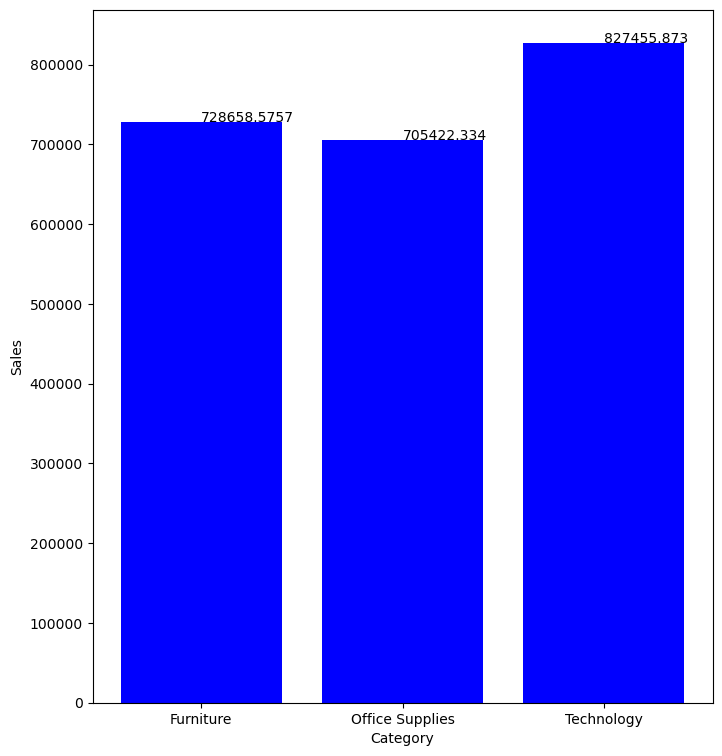

In [52]:
# i print the bar chart grouped by Category
plt.figure(figsize = (8, 9))

plt.bar(lista1['Sales'].index, lista1['Sales'], color = 'b') # create the barplot to indicate the number of repetitiones of each class
add_value_label(lista1['Sales'].index, lista1['Sales']) # add the label values
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()  #plot the bar chart

In [53]:
lista2 = sales[['Category', 'Sales']].groupby('Category').size()
lista2

Category
Furniture          2078
Office Supplies    5909
Technology         1813
dtype: int64

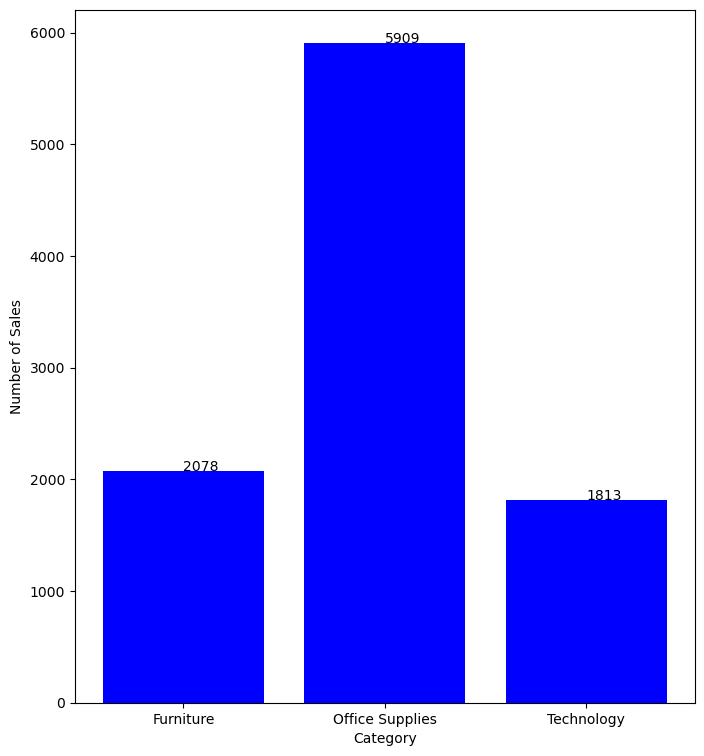

In [54]:
# i print the bar chart of the number of Sales grouped by Category
plt.figure(figsize = (8, 9))

plt.bar(lista2.index, lista2, color = 'b') # create the barplot to indicate the number of repetitiones of each class
add_value_label(lista2.index, lista2) # add the label values
plt.xlabel('Category')
plt.ylabel('Number of Sales')
plt.show()  #plot the bar chart

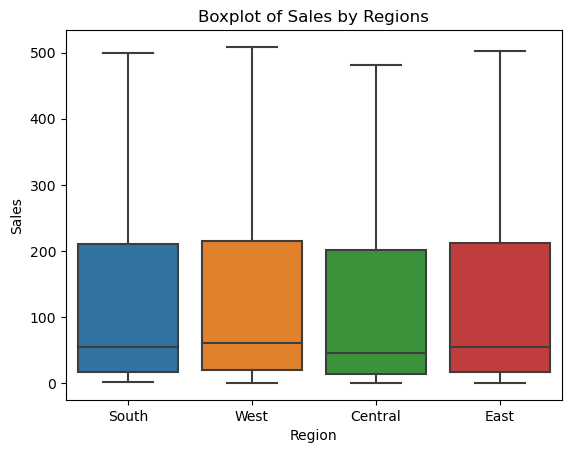

In [90]:
# create a boxplot of Sales grouped by Regions without outliers
sns.boxplot(x = sales['Region'], 
            y = sales['Sales'], showfliers=False)
plt.title('Boxplot of Sales by Regions')#change the title
plt.show()#show the boxplot

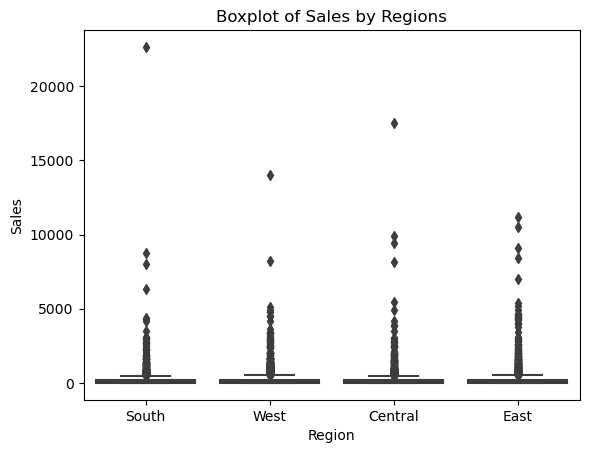

In [91]:
# create a boxplot of Sales grouped by Regions with outliers
sns.boxplot(x = sales['Region'], 
            y = sales['Sales'])
plt.title('Boxplot of Sales by Regions')#change the title
plt.show()#show the boxplot

In [92]:
sales['Delivery Time Seconds'] = sales['Delivery Time'].dt.total_seconds()# express the delivery time in seconds

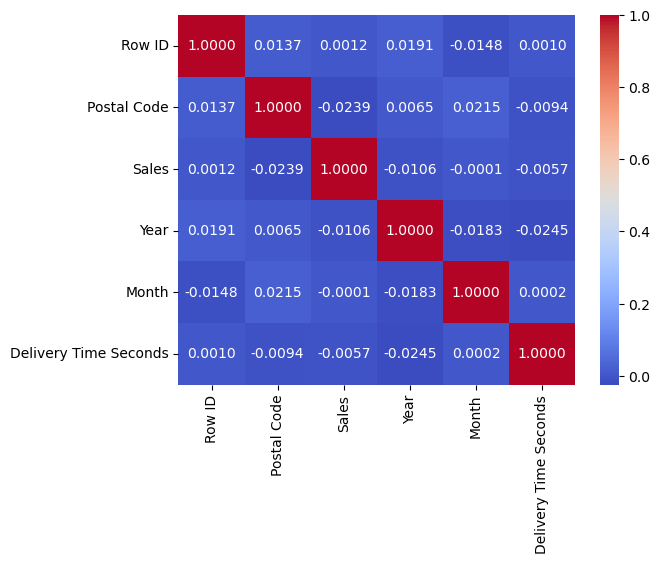

In [93]:
# I am going to see the correlation matrix between the variables

corrmat_new = sales.corr()# create the correlation matrix
#print the headmap of the group which have been made 
sns.heatmap(corrmat_new, annot=True, cmap='coolwarm', fmt='.4f')
plt.show()

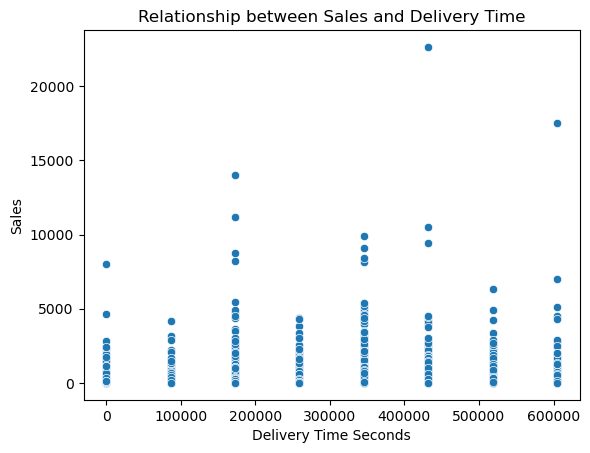

In [94]:
#plot the scatterplot of Delivery Time and Sales
sns.scatterplot(x = sales['Delivery Time Seconds'], 
            y = sales['Sales'])
plt.title('Relationship between Sales and Delivery Time')#change the title
plt.show()

In [95]:
# I am going to split the dataset into training and testing sets
# first i separate the predictive variable Y and the predictors variables X
y= sales_final['Sales']
x = sales_final.drop(['Sales'], axis=1)
#create the training and testing sets using to create de testing set the 20% of data
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=23)

In [96]:
#set that I will use a Random Forest model 
modelo1 = RandomForestRegressor(n_estimators=100, random_state=42)
#train the model
modelo1.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [97]:
#now i am going to make predictions using the Random Forest model 
y_pred1 = modelo1.predict(x_test)

In [98]:
# i am going to study the accuracy of the Random Forest model  using the MAE, MSE, R-squared
MAE_1 = mean_absolute_error(y_test, y_pred1)#calculate MAE
MSE_1 = mean_squared_error(y_test, y_pred1)#calculate MSE
R2_1 = r2_score(y_test, y_pred1)#calculate R-squared
print('MAE value: ', MAE_1)
print('MSE value: ',MSE_1)
print('R-squared value: ',R2_1)

MAE value:  0.168631549106737
MSE value:  0.2098752863502968
R-squared value:  0.7742164858259704


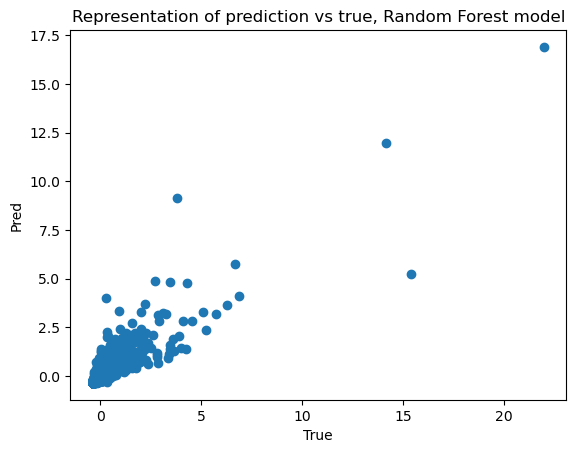

In [99]:
#plot the predicted values and the true values of the Random Forest model 
plt.scatter(y_test, y_pred1)
plt.title(u'Representation of prediction vs true, Random Forest model')
plt.xlabel('True')
plt.ylabel('Pred')
plt.show()

In [100]:
# now study the importance by node purity to predict Sales
result= modelo1.feature_importances_# get the importance of the features
# put the features and them importances in a dataframe
mostrar = pd.DataFrame()
mostrar['variables'] =  x_train.columns.values
mostrar['importance'] = result
mostrar

,variables,importance
0,Row ID,0.013437
1,Order ID,0.016126
2,Order Date,0.011249
3,Ship Date,0.010215
4,Ship Mode,0.003062
5,Customer ID,0.056816
6,Customer Name,0.069982
7,Country-City,0.019361
8,Postal Code,0.011515
9,Product ID,0.215261


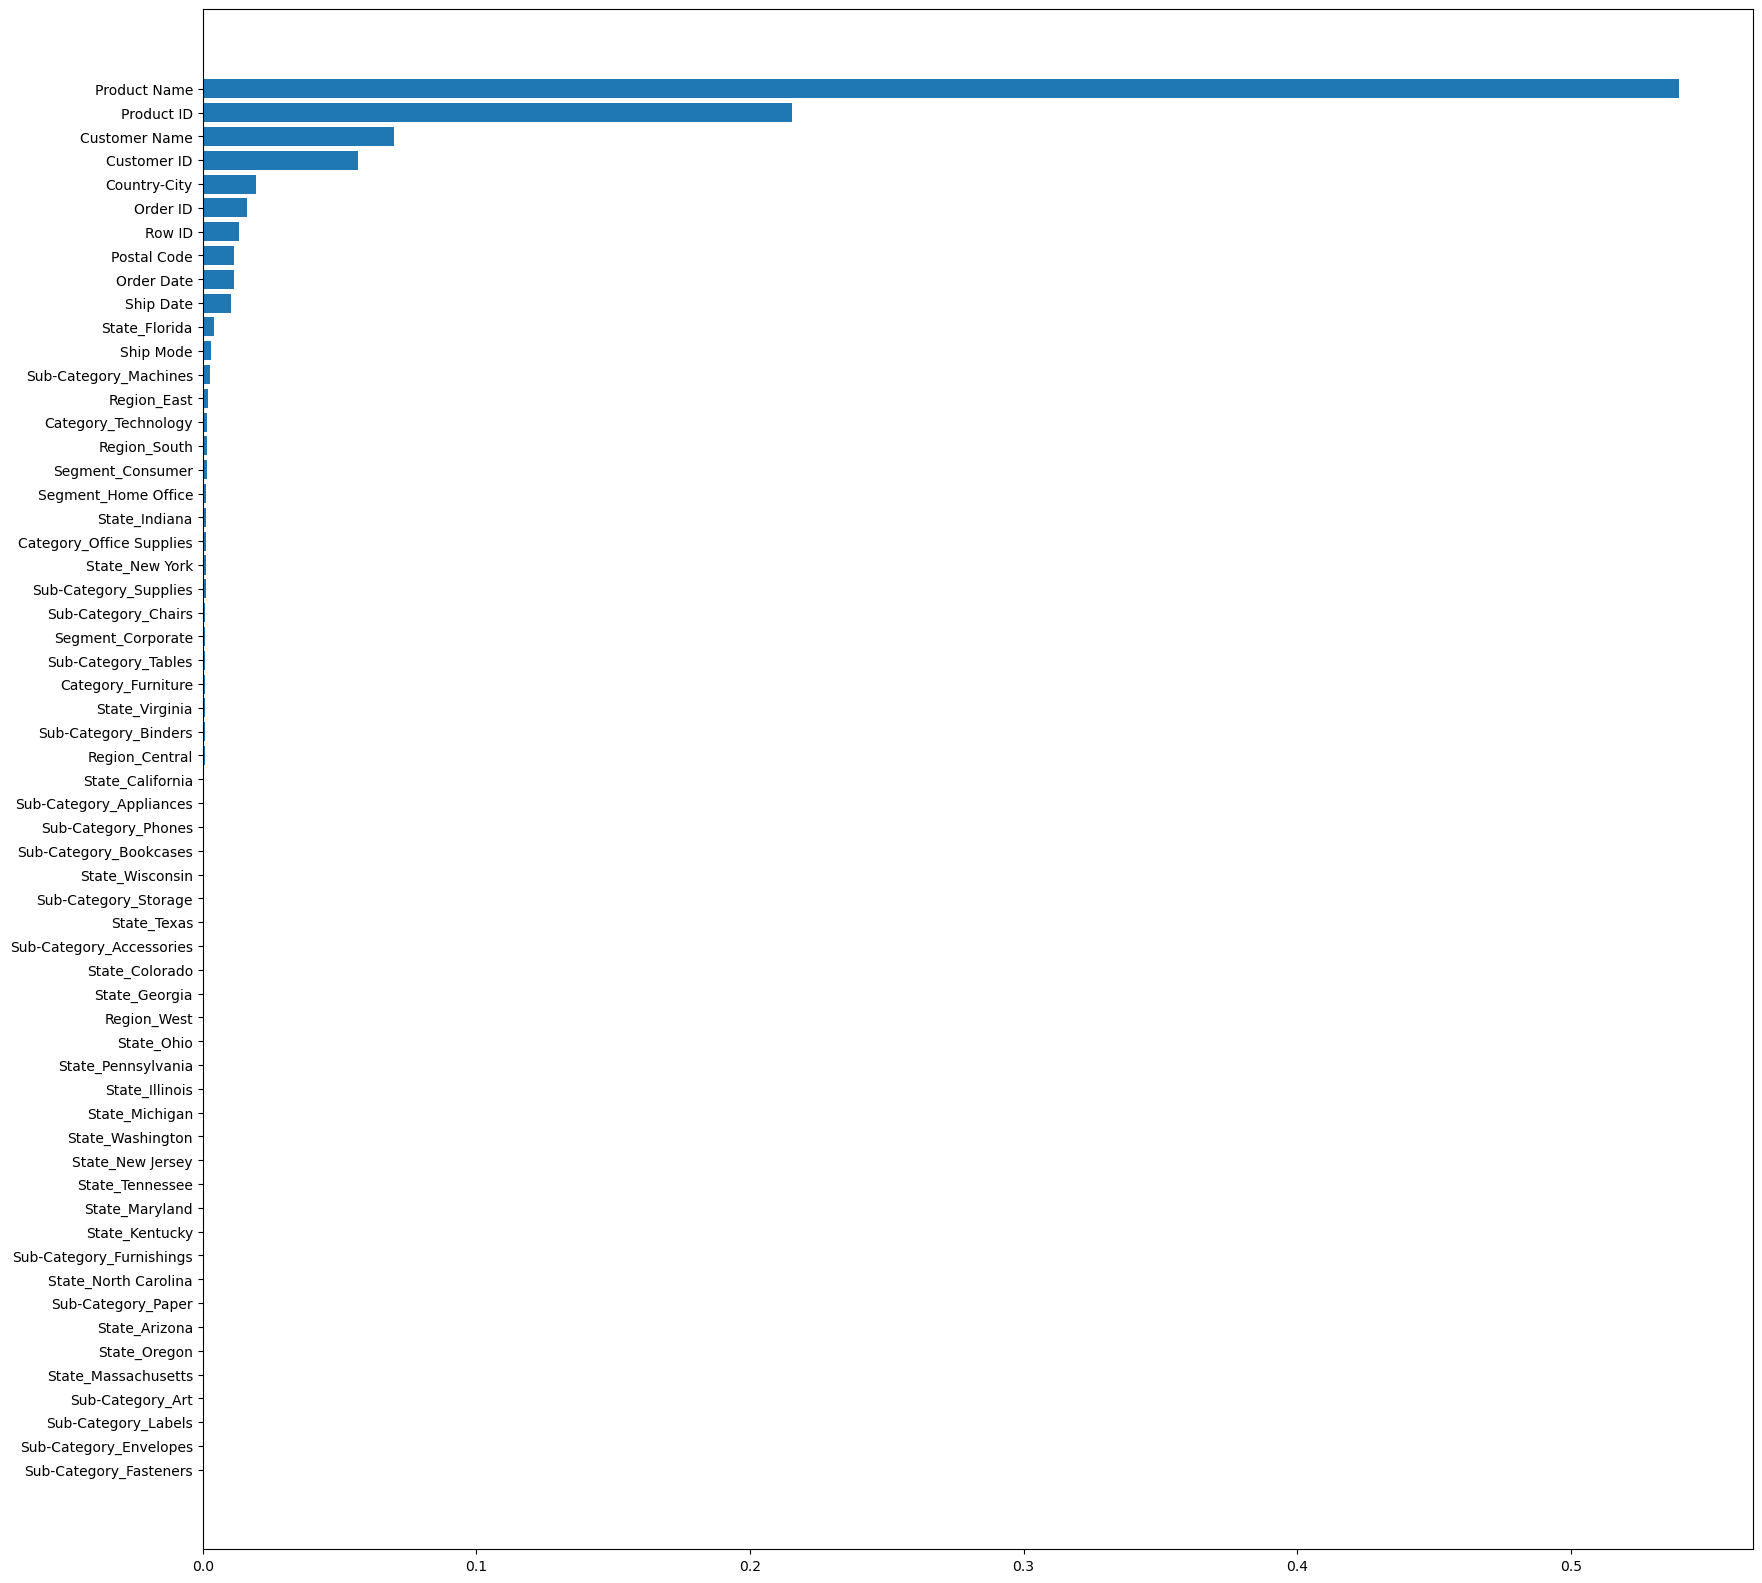

In [101]:
indices = np.argsort(result)# order the dataframe
# print a bar plot of the importance of the features
fig, ax = plt.subplots(figsize=(20, 20))
ax.barh(range(len(result)), result[indices])
ax.set_yticks(range(len(result)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])

In [102]:
# now study the permutation importance to predict Sales
importancia = permutation_importance(modelo1, x_train, y_train)
# store mean y desviation in a dataframe
sales_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
sales_importancia['feature'] =  x_train.columns.values
sales_importancia

,importances_mean,importances_std,feature
0,0.012185,6.702679e-04,Row ID
1,0.016068,8.700095e-04,Order ID
2,0.011941,4.960114e-04,Order Date
3,0.011281,4.849267e-04,Ship Date
4,0.003353,3.743643e-04,Ship Mode
5,0.064155,1.218717e-03,Customer ID
6,0.077269,9.650953e-04,Customer Name
7,0.033307,1.340547e-03,Country-City
8,0.011067,7.884567e-04,Postal Code
9,0.138538,1.989529e-03,Product ID


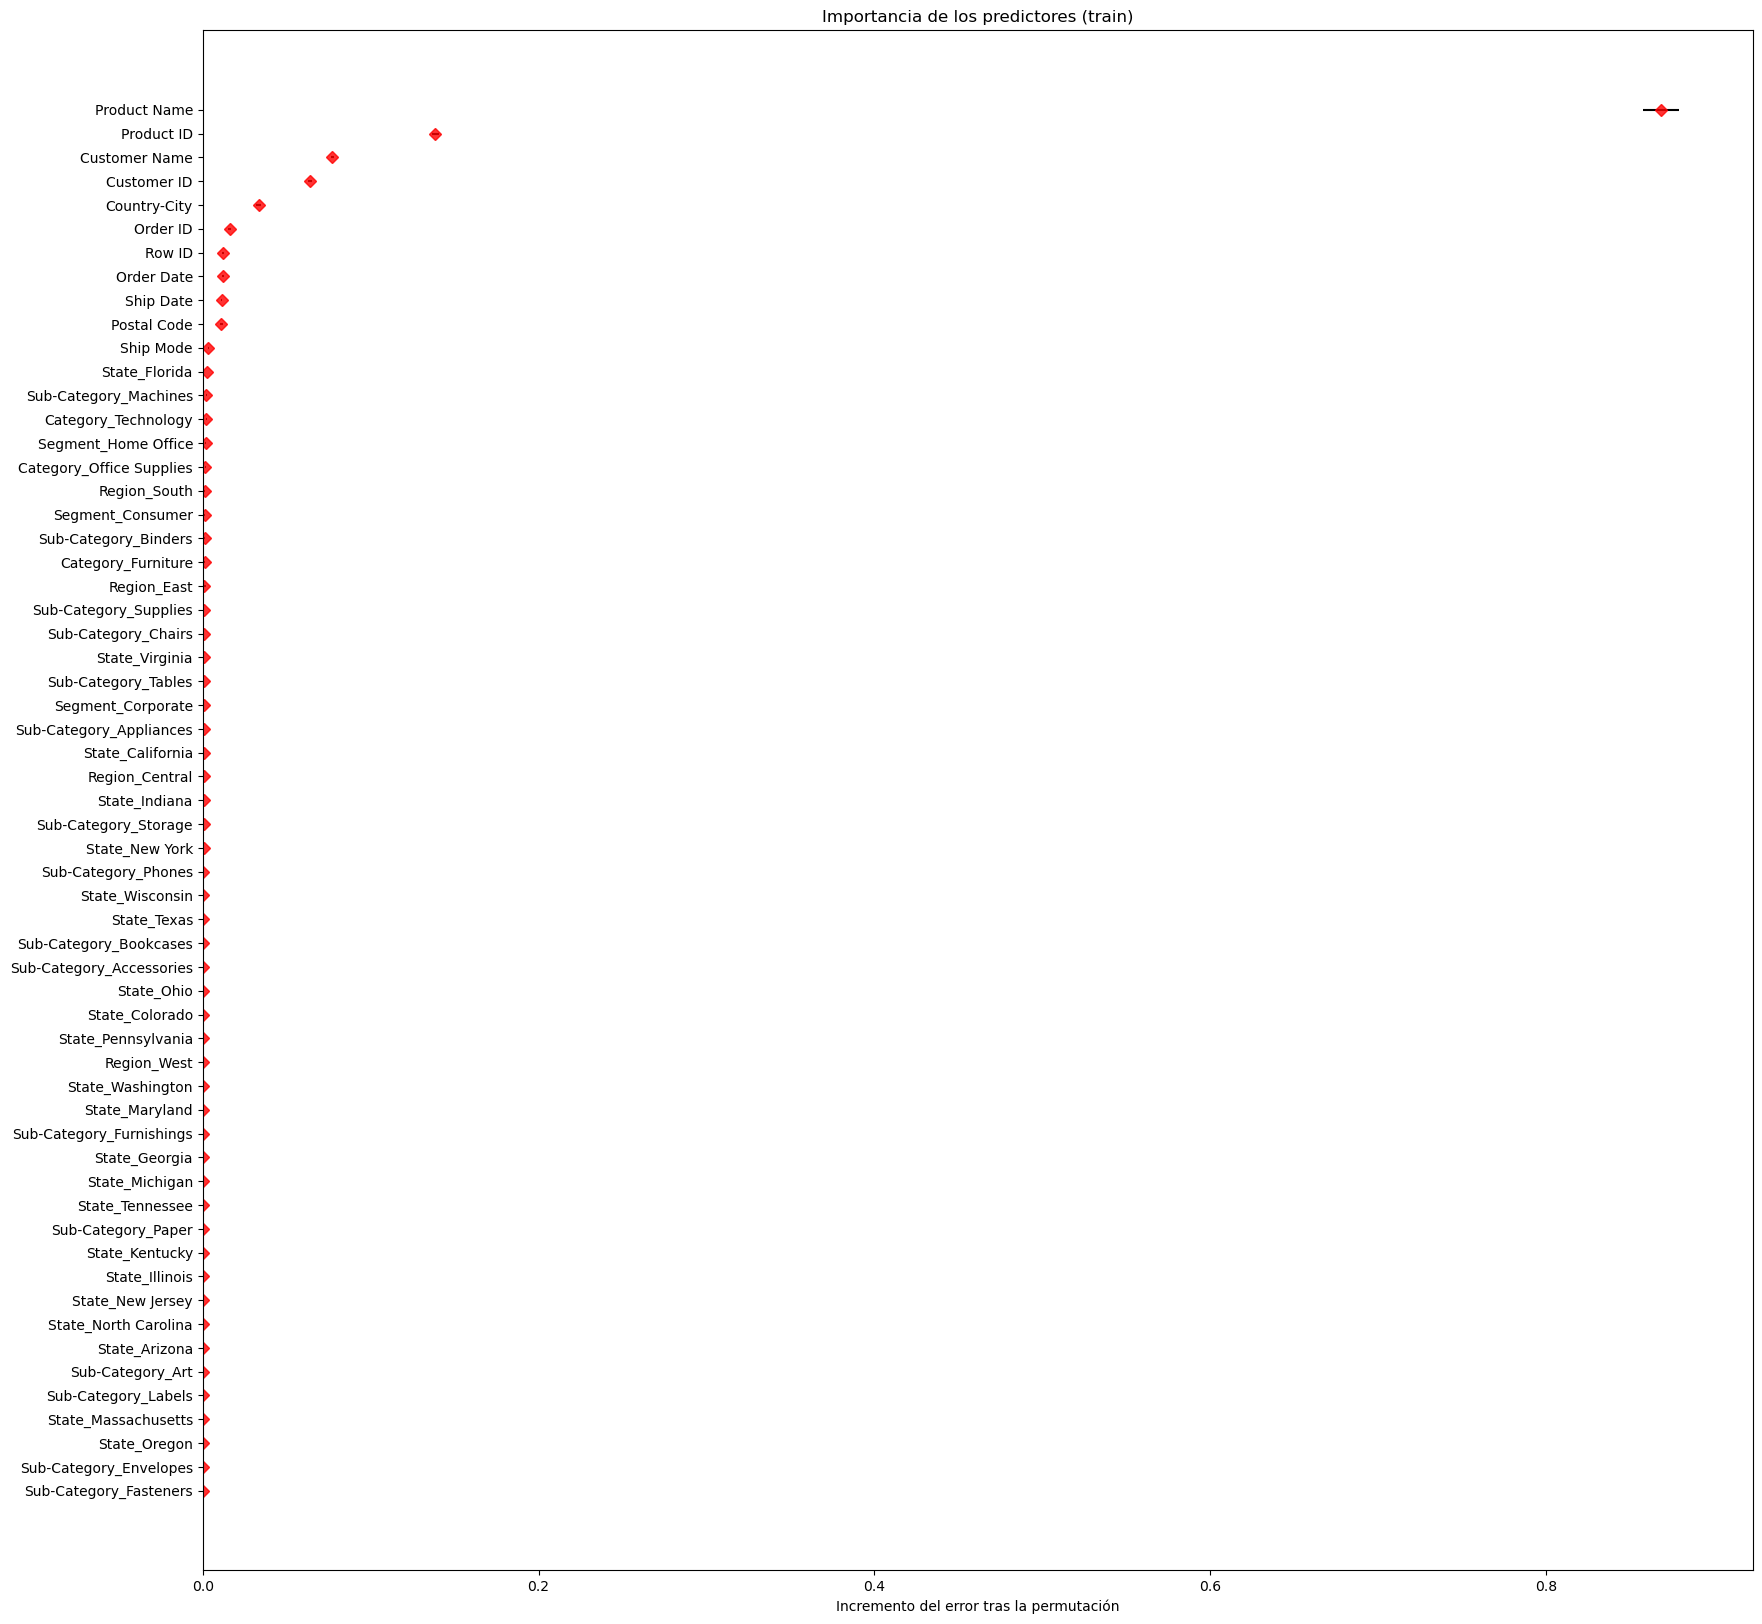

In [103]:
# plot the importance of each variable in the permutation
fig, ax = plt.subplots(figsize=(20, 20))
sales_importancia = sales_importancia.sort_values('importances_mean', ascending=True)
ax.barh(
    sales_importancia['feature'],
    sales_importancia['importances_mean'],
    xerr=sales_importancia['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    sales_importancia['importances_mean'],
    sales_importancia['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutación');